## Notebook con pruebas destinadas a modelizar la relación entre la potencia, velocidad, viento, porcentaje de desnivel y los coeficientes de rozamiento y aerodinámico

In [2]:
#Conviene recordar que la Potencia viene dada por la siguiente formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

Dónde:

P es la potencia necesaria

$\rho$ es la densidad del aire

V es la velocidad

wV es velocidad el viento

Cd es el coeficiente de drag

A es el área efectiva

Cr es el coeficiente de rozamiento

$\%$ es la pendiente

m es la masa total del conjunto bicicleta - ciclista

Desarrollando la fórmula...

$P = \frac{\rho CdA}{2}(V^3+2V^2wV+VwV^2)+CrmgV+\%mgV$

### Importamos librerias

In [3]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np
import math as mt

### Cargamos los datos

In [4]:
path = '../Entrenamientos/Procesado_Tramos.xlsx'

In [5]:
df = pd.read_excel(path)

In [6]:
df.describe()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum
count,1566.000000,1566.000000,1566.000000,1564.000000,1566.000000,1566.000000,1566.000000,1563.000000,1566.000000,1566.000000
mean,88.273946,3193.413155,3237.544700,172.841148,77.945083,604.974227,inf,-0.523086,NaN,43956.065230
std,74.367035,2006.879552,2007.195839,58.752558,163.853506,990.936845,NaN,15.893856,NaN,27597.295988
min,0.000000,0.000000,5.000000,0.000000,-19.000000,0.000000,-5.142857,-30.119336,-inf,63.000000
25%,35.000000,1533.000000,1561.250000,138.296295,6.000000,50.337673,25.886720,-11.651183,-0.673262,20811.460000
50%,71.000000,3030.000000,3163.000000,180.189194,39.000000,328.367595,31.469712,-0.671048,-0.001459,42480.000000
75%,116.000000,4783.000000,4819.000000,215.477559,78.000000,682.200031,37.867565,11.295255,0.582053,65076.261277
max,345.000000,7796.000000,7830.000000,394.699287,2747.000000,10273.070042,inf,29.972648,inf,107610.184614


### Filtramos los datos

In [7]:
#Quitamos los datos erróneos
df = df[df["viento_aparente"]!=-np.inf]
df = df[df["porc"]!=np.inf]

#Nos quedamos con tramos largos para evitar 'outliers' por errores en las mediciones
df["puntos_en_tramo"]= df["tramo_final"]-df["tramo_inicial"]
df = df[df["puntos_en_tramo"]>10]
df = df[df["dist"]>400]

In [8]:
df.describe()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,puntos_en_tramo
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,75.742898,3236.553977,3324.062500,170.397681,155.754261,1197.764171,31.884690,0.206131,-0.013950,45182.282085,87.508523
std,62.024779,2032.023813,2030.134928,61.189771,220.168319,1236.629743,8.927396,12.940261,2.313670,27986.826277,91.780336
min,0.000000,0.000000,65.000000,1.742131,34.000000,400.613923,11.618577,-29.536164,-6.677410,624.000000,23.000000
25%,29.000000,1518.000000,1589.750000,126.828829,60.000000,529.620097,24.830482,-8.474684,-1.760643,21362.893919,37.000000
50%,65.000000,3036.500000,3205.000000,181.767777,86.000000,741.350014,31.938754,0.320381,-0.367563,44029.333291,54.000000
75%,105.000000,4792.000000,4843.500000,221.011141,160.000000,1220.595748,38.095553,8.653271,1.735269,66243.249904,91.000000
max,345.000000,7796.000000,7830.000000,278.991626,2747.000000,10273.070042,69.830249,29.517057,7.137195,107610.184614,796.000000


In [9]:
df.head()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,prueba,puntos_en_tramo
8,8,136,164,73.327512,49,412.000000,30.269388,6.109815,-1.811555,1413.000000,20180225_LEVS_195_90_R_E.gpx,28
13,13,190,222,206.796051,64,454.289186,25.553767,6.258684,1.412053,2271.000000,20180225_LEVS_195_90_R_E.gpx,32
14,14,222,281,127.358925,74,774.757500,37.690905,8.309926,-1.323913,3049.515185,20180225_LEVS_195_90_R_E.gpx,59
15,15,281,394,227.806936,226,1931.242500,30.763155,6.478255,1.227197,4979.000000,20180225_LEVS_195_90_R_E.gpx,113
17,17,414,700,229.792174,594,3826.821790,23.192859,3.383788,2.599847,9105.681852,20180225_LEVS_195_90_R_E.gpx,286


In [10]:
# Si recordamos la formula de la potencia, vamos a tratar de despejar el CdA y el Cr
# Fijamos rho en 1,2
# m = 90kg (conjunto ciclista + bici)
# Calculamos 3 terminos. Termino CdA, Cr y %

Venimos de esta fórmula:

$P = \frac{\rho CdA}{2}(V^3+2V^2wV+VwV^2)+CrmgV+\%mgV$

Desarrollándola obtenemos:

$\frac{P}{V} = \frac{\rho CdA}{2}(V^2+2VwV+wV^2)+Crmg+\%mg$

Agrupando términos

$\frac{P}{V} = \frac{\rho CdA}{2}Z+0.004mg+Smg$

Vamos a fijar el Cr en 0.004 que es un valor aproximado y calculamos Z y S

#### Cálculo de features adicionales para poder despejar el CdA de la fórmula

In [11]:
#Calculo de S
df['S2'] = df['porc']/100
df['S1'] = [mt.atan(x) for x in df['S2']]
df['S'] = [mt.sin(x) for x in df['S1']]
df.drop(['S2','S1'],inplace=True,axis=1)

#Cálculo de Z
df['Z'] = (df['spd']/3.6)**2 + (2*df['spd']*df['viento_aparente'])/3.6 + (df['viento_aparente']/3.6)**2

#Despejamos el CdA
df['T'] = df['pwr']/(df['spd']/3.6) - df['S']*90*9.81 - 0.004*90*9.81
df['CdA'] = (df['T']*2)/(df['Z']*1.2)
df

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,prueba,puntos_en_tramo,S,Z,T,CdA
8,8,136,164,73.327512,49,412.000000,30.269388,6.109815,-1.811555,1413.000000,20180225_LEVS_195_90_R_E.gpx,28,-0.018113,176.322248,21.180988,0.200211
13,13,190,222,206.796051,64,454.289186,25.553767,6.258684,1.412053,2271.000000,20180225_LEVS_195_90_R_E.gpx,32,0.014119,142.259526,13.135940,0.153896
14,14,222,281,127.358925,74,774.757500,37.690905,8.309926,-1.323913,3049.515185,20180225_LEVS_195_90_R_E.gpx,59,-0.013238,288.947629,20.320730,0.117211
15,15,281,394,227.806936,226,1931.242500,30.763155,6.478255,1.227197,4979.000000,20180225_LEVS_195_90_R_E.gpx,113,0.012271,186.978295,12.292972,0.109576
17,17,414,700,229.792174,594,3826.821790,23.192859,3.383788,2.599847,9105.681852,20180225_LEVS_195_90_R_E.gpx,286,0.025990,85.988639,9.190489,0.178134
18,18,700,734,75.889400,47,498.354680,38.171848,0.349958,-2.206434,9609.363665,20180225_LEVS_195_90_R_E.gpx,34,-0.022059,119.860641,23.101421,0.321226
19,19,734,796,249.876164,149,773.349928,18.684965,1.184051,4.639896,10383.060083,20180225_LEVS_195_90_R_E.gpx,62,0.046349,39.338140,3.689994,0.156337
20,20,796,878,127.670147,100,1037.923726,37.365254,1.442258,-1.734771,11419.820070,20180225_LEVS_195_90_R_E.gpx,82,-0.017345,137.828151,24.082926,0.291219
23,23,882,948,223.008805,120,1068.860019,32.065801,5.900103,1.333961,12532.386473,20180225_LEVS_195_90_R_E.gpx,66,0.013338,187.130083,9.728911,0.086650
24,24,948,995,64.648830,65,652.699904,36.149533,5.938051,-1.838635,13192.980449,20180225_LEVS_195_90_R_E.gpx,47,-0.018383,222.807500,19.137109,0.143151


In [12]:
df['CdA'].mean()

0.29257305180047255

(array([ 78., 624.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-14.89471001,  -0.61322496,  13.66826009,  27.94974514,
         42.23123018,  56.51271523,  70.79420028,  85.07568533,
         99.35717038, 113.63865543, 127.92014048, 142.20162552,
        156.48311057, 170.76459562, 185.04608067, 199.32756572,
        213.60905077, 227.89053582, 242.17202086, 256.45350591,
        270.73499096]),
 <a list of 20 Patch objects>)

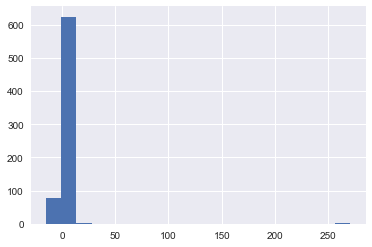

In [13]:
plt.hist(df['CdA'],bins=20)

#### El valor medio es bastante aproximado, pero en el histograma, vemos zonas con CdA en negativo y otras con unos valores muy elevados, cuando por definición el CdA no puede ser negativo
Vamos a analizar esas zonas de valores fuera de lo normal

In [14]:
#Analizamos en primer lugar los tramos con CdA negativo que no tiene sentido pues implicaría que el sujeto no presenta 
#resistencia al aire
df_analisis = df[df["CdA"]<0]

(array([21.,  3., 38., 13., 52., 54., 74., 15.,  0.,  2.]),
 array([-29.53616362, -25.99451716, -22.45287069, -18.91122423,
        -15.36957776, -11.8279313 ,  -8.28628483,  -4.74463837,
         -1.2029919 ,   2.33865456,   5.88030102]),
 <a list of 10 Patch objects>)

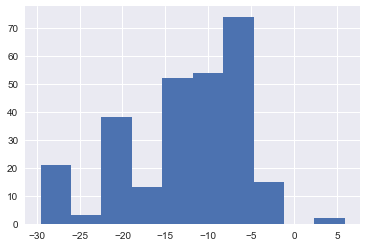

In [15]:
#En primer lugar vemos que son tramos en su mayoría con viento a favor y relativamente alto
plt.hist(df_analisis['viento_aparente'])

(array([ 2., 11., 45., 59., 27., 47., 43., 28.,  9.,  1.]),
 array([-5.83065104, -4.6145826 , -3.39851417, -2.18244574, -0.9663773 ,
         0.24969113,  1.46575956,  2.681828  ,  3.89789643,  5.11396487,
         6.3300333 ]),
 <a list of 10 Patch objects>)

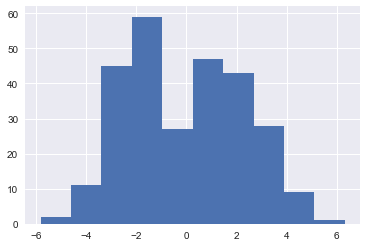

In [16]:
#Los porcentajes son entorno a 0, sin presentar una distribución clara
plt.hist(df_analisis['porc'])

(array([245., 140.,  85.,  53.,  28.,   9.,  16.,  18.,  19.,  10.,  11.,
          3.,  13.,   4.,   6.,   2.,   7.,   9.,   5.,   3.,   3.,   1.,
          4.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([  400.61392251,   598.06304489,   795.51216727,   992.96128965,
         1190.41041203,  1387.85953442,  1585.3086568 ,  1782.75777918,
         1980.20690156,  2177.65602394,  2375.10514633,  2572.55426871,
         2770.00339109,  2967.45251347,  3164.90163585,  3362.35075823,
         3559.79988062,  3757.249003  ,  3954.69812538,  4152.14724776,
         4349.59637014,  4547.04549253,  4744.49461491,  4941.94373729,
         5139.39285967,  5336.84198205,  5534.29110444,  5731.74022682,
         5929.1893492 ,  6126.63847158,  6324.08759396,  6521.53671634,
         6718.98583873,  6916.43496111,  7113.88408349,  7311.33320587,
         7

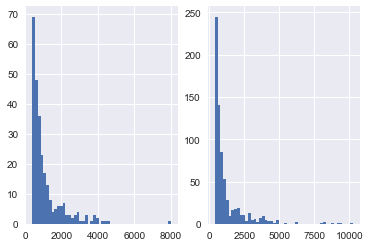

In [17]:
#Mayoritariamente son tramos cortos, aunque esto es lógico si vemos también el histograma de distancias de los tramos sin filtrar
plt.subplot(1,2,1)
plt.hist(df_analisis['dist'], bins=50)
plt.subplot(1,2,2)
plt.hist(df['dist'], bins=50)

(array([ 5.,  5., 12., 26., 33., 37., 30., 52., 54., 18.]),
 array([ 12.15518873,  38.27160967,  64.38803061,  90.50445155,
        116.6208725 , 142.73729344, 168.85371438, 194.97013533,
        221.08655627, 247.20297721, 273.31939815]),
 <a list of 10 Patch objects>)

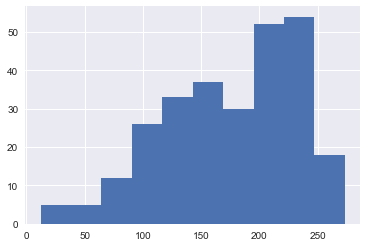

In [18]:
#La potencia es en general la normal en un recorrido ciclista. La mayoría de tramos están en torno a la potencia media del ciclista
#aunque hay bastantes tramos de potencias muy bajas
plt.hist(df_analisis['pwr'])

(array([ 9., 29., 34., 39., 35., 53., 29., 23., 12.,  9.]),
 array([13.25342208, 16.86535131, 20.47728054, 24.08920976, 27.70113899,
        31.31306822, 34.92499745, 38.53692667, 42.1488559 , 45.76078513,
        49.37271436]),
 <a list of 10 Patch objects>)

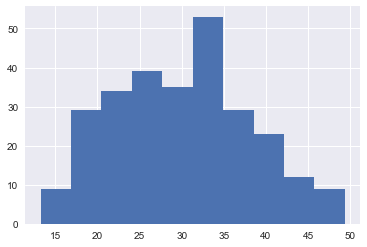

In [19]:
#En cuanto a velocidad al igual con la potencia, es lo razonable teniendo en cuenta todo lo anterior
#Es decir, hay pendientes de todo tipo, potencias en los valores esperados y simplemente se encuentran vientos favorables
plt.hist(df_analisis['spd'])

#### Como conclusión parece que no es muy apropiado este enfoque para tratar de determinar el CdA

### Uso de Regresion Lineal

In [20]:
from sklearn.linear_model import LinearRegression

Usamos una Regresión Lineal para tratar de despejar los coeficientes que antes hemos calculado aritmeticamente

Deberíamos de encontrar valores similares

In [21]:
regr_cda = LinearRegression(fit_intercept=False)

In [22]:
df_lm_x = df[['Z']]
df_lm_y = df[['T']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

In [23]:
regr_cda.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [24]:
Y_pred = regr_cda.predict(X_test)

In [25]:
regr_cda.coef_
cda_new = regr_cda.coef_*2/1.2
cda_new

array([[0.04169941]])

No parece que el coeficiente encontrado tenga más sentido de negocio que el aritmético

### Regresion Polinómica

Cambiamos el enfoque y buscamos capacidad de predicción de la potencia en función de la velocidad

Sabemos que la potencia depende sobretodo de la velocidad y por eso empezamos trabajando con este factor

In [26]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)

In [27]:
#Creamos las features adicionales para usar como terminos independientes
#La potencia será el Target

df['V3'] = (df['spd']/3.6)**3
df['V2'] = (df['spd']/3.6)**2
df['V'] = df['spd']/3.6


df_lm_x = df[['V3','V2','V']]
df_lm_y = df[['pwr']]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

In [29]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
Y_pred = regr.predict(X_test)
#Y_pred = model.predict(X_test)

In [31]:
regr.coef_

array([[ 0.09034276, -2.54838002,  8.54858747]])

In [32]:
Cda = pd.DataFrame(regr.coef_)[0]*2/1.2
Cda

0    0.150571
Name: 0, dtype: float64

In [33]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_pred))
print(metrics.explained_variance_score(Y_test, Y_pred))

2487.4434823752044
0.36891778954487375


Los valores de varianza explicada son muy bajos. Probamos tramo a tramo en vez de con tramos agrupados

#### Tramo a Tramo

In [34]:
df.describe()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,puntos_en_tramo,S,Z,T,CdA,V3,V2,V
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,75.742898,3236.553977,3324.062500,170.397681,155.754261,1197.764171,31.884690,0.206131,-0.013950,45182.282085,87.508523,-0.000140,113.055629,18.870077,0.292573,861.932873,84.584770,8.856858
std,62.024779,2032.023813,2030.134928,61.189771,220.168319,1236.629743,8.927396,12.940261,2.313670,27986.826277,91.780336,0.023121,255.206138,9.629830,10.327172,717.825112,46.307061,2.479832
min,0.000000,0.000000,65.000000,1.742131,34.000000,400.613923,11.618577,-29.536164,-6.677410,624.000000,23.000000,-0.066626,-444.660275,-3.109524,-14.894710,33.616409,10.415998,3.227383
25%,29.000000,1518.000000,1589.750000,126.828829,60.000000,529.620097,24.830482,-8.474684,-1.760643,21362.893919,37.000000,-0.017604,-61.557669,11.627050,-0.218766,328.132978,47.573593,6.897356
50%,65.000000,3036.500000,3205.000000,181.767777,86.000000,741.350014,31.938754,0.320381,-0.367563,44029.333291,54.000000,-0.003676,84.205442,17.497652,0.057747,698.307098,78.710190,8.871876
75%,105.000000,4792.000000,4843.500000,221.011141,160.000000,1220.595748,38.095553,8.653271,1.735269,66243.249904,91.000000,0.017350,236.790094,25.088240,0.154788,1184.991907,111.980804,10.582098
max,345.000000,7796.000000,7830.000000,278.991626,2747.000000,10273.070042,69.830249,29.517057,7.137195,107610.184614,796.000000,0.071191,1065.622831,58.150296,270.734991,7298.326115,376.254911,19.397291


In [35]:
#Usamos la misma estrategia pero con tramos más cortos
df_lm_x = df[['V','V2','V3','prueba','tramo']]
df_lm_y = df[['pwr']]

In [36]:
df_lm_x

,V,V2,V3,prueba,tramo
8,8.408163,70.697209,594.433680,20180225_LEVS_195_90_R_E.gpx,8
13,7.098269,50.385416,357.649215,20180225_LEVS_195_90_R_E.gpx,13
14,10.469696,109.614533,1147.630832,20180225_LEVS_195_90_R_E.gpx,14
15,8.545321,73.022508,624.000752,20180225_LEVS_195_90_R_E.gpx,15
17,6.442461,41.505303,267.396291,20180225_LEVS_195_90_R_E.gpx,17
18,10.603291,112.429782,1192.125699,20180225_LEVS_195_90_R_E.gpx,18
19,5.190268,26.938882,139.820015,20180225_LEVS_195_90_R_E.gpx,19
20,10.379237,107.728566,1118.140347,20180225_LEVS_195_90_R_E.gpx,20
23,8.907167,79.337621,706.673425,20180225_LEVS_195_90_R_E.gpx,23
24,10.041537,100.832465,1012.512927,20180225_LEVS_195_90_R_E.gpx,24


In [37]:
df_lm_x.prueba.unique()

array(['20180225_LEVS_195_90_R_E.gpx', '20180316_LEVS_195_90_R_E.gpx',
       '20180318_LEVS_195_90_R_E.gpx', '20180322_LEVS_195_90_R_E.gpx',
       '20180329_LEVD_195_90_R_E.gpx', '20180406_LEVS_195_90_R_E.gpx',
       '20180415_LEVS_195_90_R_E.gpx', '20180422_LEVS_195_90_R_E.gpx',
       '20180429_LEMG_195_90_R_C.gpx', '20180526_LEVS_195_90_C_E.gpx',
       '20180527_LEVS_195_90_C_E.gpx'], dtype=object)

In [38]:
result = []

for p in df_lm_x.prueba.unique():
    df_inter = df[df_lm_x["prueba"]==p]
    df_target = df_inter['pwr']
    df_model = df_inter[['V3','V2','V']]

    regr_pp = LinearRegression(fit_intercept=True)

    regr_pp.fit(df_model, df_target)
    result.append((p,regr_pp.coef_))


In [39]:
pd.DataFrame(result)[1]
#La primera columna representa el coeficiente de Cda. Habría que hacer la transformación de *2/1.2, pero ya se ve que hay
#grandes diferencias entre los valores y no tiene sentido de negocio
#Todos los entrenamientos han sido realizados en solitario, se ha añadido el viento en cada uno de ellos y por tanto el CdA
#debería ser relativamente constante y parecido entre ellos

0     [0.2924833410896703, -8.042660821820434, 50.52...
1     [1.4615674615543266, -37.69909655604498, 288.0...
2     [-0.056457826865868276, 2.1044894702386525, -3...
3     [-0.025588683702009556, 1.4406852609095693, -3...
4     [-0.8715856866891242, 22.181209155405615, -184...
5     [0.1868131140557887, -4.449587052574664, 13.00...
6     [0.38302108943950774, -11.044319264822008, 81....
7     [-0.18218976739239998, 6.251989884918807, -79....
8     [0.07524627181025062, -3.3053364073744547, 27....
9     [0.8477283537989085, -23.739695296930986, 195....
10    [0.7152788877879611, -20.469753557102656, 171....
Name: 1, dtype: object

### Enfoque por términos

Calculamos a continuación los términos donde van incluidos los CdA y Cr

Adicionalmente hacemos preprocessing con Robust Scaler

In [40]:
df['wV'] = df['viento_aparente']/3.6

In [41]:
df['termino_Cda'] = (df['V3'] + 2*df['V2']*df['wV'] + df['wV']**2*df['V'])

In [42]:
df['termino_Cr'] = df['V']*90*9.81

In [43]:
df['termino_%'] = df['porc']*90*9.81 

In [44]:
df.head()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,...,Z,T,CdA,V3,V2,V,wV,termino_Cda,termino_Cr,termino_%
8,8,136,164,73.327512,49,412.000000,30.269388,6.109815,-1.811555,1413.000000,...,176.322248,21.180988,0.200211,594.433680,70.697209,8.408163,1.697171,858.622959,7423.567347,-1599.422154
13,13,190,222,206.796051,64,454.289186,25.553767,6.258684,1.412053,2271.000000,...,142.259526,13.135940,0.153896,357.649215,50.385416,7.098269,1.738523,554.295932,6267.061291,1246.701225
14,14,222,281,127.358925,74,774.757500,37.690905,8.309926,-1.323913,3049.515185,...,288.947629,20.320730,0.117211,1147.630832,109.614533,10.469696,2.308313,1709.465819,9243.694546,-1168.882500
15,15,281,394,227.806936,226,1931.242500,30.763155,6.478255,1.227197,4979.000000,...,186.978295,12.292972,0.109576,624.000752,73.022508,8.545321,1.799515,914.482913,7544.663733,1083.491948
17,17,414,700,229.792174,594,3826.821790,23.192859,3.383788,2.599847,9105.681852,...,85.988639,9.190489,0.178134,267.396291,41.505303,6.442461,0.939941,351.113222,5688.048752,2295.404918


In [45]:
df_lm = df[['pwr','termino_Cda','termino_Cr','termino_%']]

In [46]:
df_lm_x = df_lm[['termino_Cda','termino_Cr','termino_%']]
df_lm_y = df_lm[['pwr']]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

#### Robust Scaler

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
model_rs = RobustScaler()

In [50]:
X_train_rs = model_rs.fit_transform(X_train)

In [51]:
X_test_rs = model_rs.transform(X_test)

### Modelo Lineal con Robust Scaler

In [52]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

Y_pred = regr.predict(X_test)

In [53]:
print(metrics.mean_squared_error(Y_test,Y_pred))
print(metrics.explained_variance_score(Y_test, Y_pred))

891.916589772857
0.7723910352237412


In [54]:
regr.coef_

array([[-0.01645352,  0.02026891,  0.03770798]])

La varianza explicada mejora, pero aún así el coeficiente del término_cda no tiene sentido de negocio

### Support Vector Machine

Probamos diferentes configuraciones de SVM para comprobar si de esta forma podemos mejorar la capacidad de explicar el modelo

In [55]:
from sklearn import svm

In [56]:
model_svm = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
model_svm.fit(X_train_rs,Y_train)

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
Y_pred = model_svm.predict(X_test_rs)

In [58]:
print(metrics.mean_squared_error(Y_test,Y_pred))
print(metrics.explained_variance_score(Y_test, Y_pred))

757.0271760460794
0.8067762222097914


In [59]:
model_nusvm = svm.NuSVR(kernel='rbf', C=1e3, gamma=0.1)
model_nusvm.fit(X_train_rs,Y_train)

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [60]:
Y_pred_nu = model_nusvm.predict(X_test_rs)

In [61]:
print(metrics.mean_squared_error(Y_test,Y_pred_nu))
print(metrics.explained_variance_score(Y_test, Y_pred_nu))

763.0554947453802
0.805725937624983


In [62]:
model_linsvm = svm.LinearSVR(C=1e3)
model_linsvm.fit(X_train_rs,Y_train)

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1000.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [63]:
Y_pred_lin = model_linsvm.predict(X_test_rs)

In [64]:
print(metrics.mean_squared_error(Y_test,Y_pred_lin))
print(metrics.explained_variance_score(Y_test, Y_pred_lin))

887.3475059193827
0.7749932423987509


Mejora algo la explicación de la varianza, pero aún no es suficiente

Hay que recordar que se tratar de una formula física que siempre se cumple y que en iguales condiciones, la misma potencia, genera igual velocidad

Los errores de mediciones del reloj, se pueden considerar despreciables porque estamos usando tramos agrupados de mas de 400m y de más de 30s aproximadamente de duración. El error del gps es de +/-1m en campo abierto que es donde se desarrollan las pruebas

### RandomForest

Cambiamos a RandomForest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [66]:
rf = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


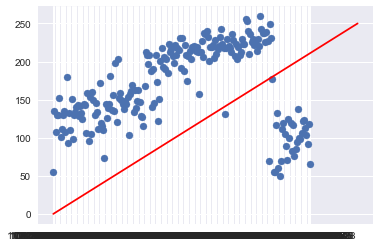

In [67]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.plot( [0,250],[0,250], c="red" )

In [68]:
print(metrics.mean_squared_error(Y_test, Y_pred))
print(metrics.explained_variance_score(Y_test, Y_pred))

827.6554102228912
0.7895155186490947


De momento los resultados son similares a SVM

Probamos un Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=0)
param_grid = {'n_estimators': [9500,10500], 'max_features': [2,3], 'n_jobs' : [2,3]}
# 'n_estimators': [1000], 'max_features': [10,15,20,25], 'max_depth':[20,20,25,25,]}
model = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10)

model.fit(X=X_train, y=np.ravel(Y_train))
print('Random forecast regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(model.best_score_)

Y_pred = model.predict(X_test)

Random forecast regression...
Best Params:
{'max_features': 3, 'n_estimators': 10500, 'n_jobs': 2}
Best CV Score:
0.7172152292211438


In [70]:
rfr = RandomForestRegressor(n_jobs=2, random_state=0, max_features=3, n_estimators=10500)
rfr.fit(X=X_train, y=np.ravel(Y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10500, n_jobs=2, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [71]:
Y_pred = rfr.predict(X_test)

In [72]:
metrics.explained_variance_score(Y_test, Y_pred)

0.7838658222857932

In [73]:
rfr.feature_importances_

array([0.08787052, 0.11077297, 0.80135651])

Si recordamos los terminos, resulta que la velocidad depende en mayor medida del porcentaje, despues del termino del coeficiente de rozamiento y por último del coeficiente aerodinámico

Los resultados son dificilmente interpretables y por tanto usables. Nos dan una idea general de como funciona el modelo, pero no pueden ser usados para tratar de predecir la velocidad en función de la potencia